In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '456fee928d46459ebe8ce646505cdcd9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



{'status': {'timestamp': '2025-12-23T23:19:42.135Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8943}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12503, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df= pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12503,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.996618e+07,1.996618e+07,False,1.741169e+12,NaN,1,NaN,NaN,None,2025-12-23T23:17:00.000Z,87205.913541,4.340392e+10,13.3400,-0.302859,-1.512323,-0.570515,-0.033555,-21.401563,-23.091096,1.741169e+12,58.9672,1.831324e+12,None,2025-12-23T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:19:42.429883
1,1027,Ethereum,ETH,ethereum,11293,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206950e+08,1.206950e+08,True,3.566875e+11,NaN,2,NaN,NaN,None,2025-12-23T23:17:00.000Z,2955.279568,2.110259e+10,3.1945,-0.143300,-1.620534,0.133330,5.194717,-24.776261,-28.949912,3.566875e+11,12.0797,3.566875e+11,None,2025-12-23T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:19:42.429883
2,825,Tether USDt,USDT,tether,163957,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.869068e+11,1.888515e+11,True,1.887561e+11,NaN,3,NaN,NaN,None,2025-12-23T23:17:00.000Z,0.999495,7.676239e+10,-9.3626,-0.011391,0.006816,-0.039244,-0.035155,-0.070619,-0.096744,1.868124e+11,6.3267,1.887561e+11,None,2025-12-23T23:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-24 04:19:42.429883
3,1839,BNB,BNB,bnb,3020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377349e+08,1.377349e+08,1.377349e+08,False,1.160105e+11,NaN,4,NaN,NaN,None,2025-12-23T23:18:00.000Z,842.274113,1.696148e+09,-13.4751,-0.174097,-1.913435,-3.492504,-0.748744,-23.969089,-17.261999,1.160105e+11,3.9293,1.160105e+11,None,2025-12-23T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:19:42.429883
4,52,XRP,XRP,xrp,1774,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.057294e+10,9.998574e+10,False,1.875738e+11,NaN,5,NaN,NaN,None,2025-12-23T23:17:00.000Z,1.876005,2.203855e+09,-16.5002,-0.220346,-1.491622,-2.620638,-8.638611,-25.164206,-36.176973,1.136352e+11,3.8484,1.876005e+11,None,2025-12-23T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:19:42.429883
5,3408,USDC,USDC,usd-coin,35779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.693599e+10,7.693599e+10,False,7.691998e+10,NaN,6,6.090122e+10,6.088855e+10,None,2025-12-23T23:17:00.000Z,0.999792,1.907811e+10,61.8930,-0.017029,0.002221,-0.003207,0.002845,-0.002574,-0.009873,7.691998e+10,2.6050,7.691998e+10,None,2025-12-23T23:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-24 04:19:42.429883
6,5426,Solana,SOL,solana,1065,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.624153e+08,6.167239e+08,True,7.622499e+10,NaN,7,5.252369e+08,6.491750e+10,None,2025-12-23T23:17:00.000Z,123.596617,3.061419e+09,-16.4214,-0.420940,-1.721574,-3.827950,-5.964186,-36.080359,-41.721427,6.951263e+10,2.3541,7.622499e+10,None,2025-12-23T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:19:42.429883
7,1958,TRON,TRX,tron,1272,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.468772e+10,9.468772e+10,True,2.683829e+10,NaN,8,9.466789e+10,2.683267e+10,None,2025-12-23T23:17:00.000Z,0.283440,4.473490e+08,-27.6652,0.073978,-0.379725,0.999698,3.159553,-6.696690,-16.318384,2.683829e+10,0.9089,2.683829e+10,N

In [5]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '456fee928d46459ebe8ce646505cdcd9',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #df2= pd.json_normalize(data['data'])
    #df2['timestamp']=pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)

    df= pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\User\Desktop\API Project\API_Data.csv'):
        df.to_csv(r'C:\Users\User\Desktop\API Project\API_Data.csv',header=True,index=False)
    else:
        df.to_csv(r'C:\Users\User\Desktop\API Project\API_Data.csv',mode='a',header=False,index=False)
        
        

In [6]:
import os
from time import time
from time import sleep

In [7]:
for i in range(333):
    api_runner()
    print("API Runner function completed successfully!")
    sleep(60)
exit()

API Runner function completed successfully!
API Runner function completed successfully!
API Runner function completed successfully!
API Runner function completed successfully!


KeyboardInterrupt: 

In [8]:
df2=pd.read_csv(r'C:\Users\User\Desktop\API Project\API_Data.csv')

In [9]:
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12503,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.996611e+07,1.996611e+07,False,1.750775e+12,NaN,1,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,87687.337484,4.323511e+10,20.6321,-0.229128,-0.402830,0.074034,0.198686,-20.746347,-22.725044,1.750775e+12,59.1500,1.841434e+12,NaN,2025-12-23T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
1,1027,Ethereum,ETH,ethereum,11293,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206950e+08,1.206950e+08,True,3.547632e+11,NaN,2,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,2939.336713,2.076172e+10,9.0204,-0.189833,-1.260850,-0.205855,3.925452,-25.226056,-29.441272,3.547632e+11,11.9857,3.547632e+11,NaN,2025-12-23T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
2,825,Tether USDt,USDT,tether,163953,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.869068e+11,1.888515e+11,True,1.887601e+11,NaN,3,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,0.999516,7.688156e+10,-5.5557,-0.008308,-0.005413,-0.026420,-0.002687,-0.059813,-0.089338,1.868164e+11,6.3116,1.887601e+11,NaN,2025-12-23T19:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-24 00:58:28.554829
3,1839,BNB,BNB,bnb,3020,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377349e+08,1.377349e+08,1.377349e+08,False,1.158465e+11,NaN,4,NaN,NaN,NaN,2025-12-23T19:57:00.000Z,841.082976,1.741423e+09,-8.7971,-0.440440,-2.008880,-3.364262,-1.104403,-24.287635,-17.286951,1.158465e+11,3.9139,1.158465e+11,NaN,2025-12-23T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
4,52,XRP,XRP,xrp,1774,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.057294e+10,9.998574e+10,False,1.881342e+11,NaN,5,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,1.881611,2.430184e+09,1.2085,0.024283,-1.115478,-2.419635,-9.389287,-25.001085,-37.078400,1.139747e+11,3.8492,1.881611e+11,NaN,2025-12-23T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1831,Bitcoin Cash,BCH,bitcoin-cash,1108,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",2.100000e+07,1.997095e+07,1.997095e+07,False,1.146788e+10,NaN,11,NaN,NaN,NaN,2025-12-23T23:21:00.000Z,574.228141,3.720855e+08,-20.8599,-0.355214,-2.679992,5.161867,6.311625,14.224593,3.182221,1.146788e+10,0.3884,1.205879e+10,NaN,2025-12-23T23:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:22:47.411019
236,1975,Chainlink,LINK,chainlink,2173,2017-09-20T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'defi', 'inte...",1.000000e+09,7.081000e+08,1.000000e+09,False,1.234462e+10,NaN,12,NaN,NaN,NaN,2025-12-23T23:22:00.000Z,12.344616,4.386315e+08,-12.6728,-0.346056,-1.917672,-4.402066,-1.483378,-31.096805,-42.980177,8.741222e+09,0.2961,1.234462e+10,NaN,2025-12-23T23:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-12-24 04:22:47.411019
237,328,Monero,XMR,monero,346,2014-05-21T00:00:00.000Z,"['mineable', 'pow', 'medium-of-exchange', 'pri...",NaN,1.844674e+07,1.844674e+07,True,8.253091e+09,NaN,13,NaN,NaN,NaN,2025-12-23T23:21:

In [10]:
pd.set_option('display.float_format',lambda x:'%5f' % x)

In [11]:
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12503,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19966109.000000,19966109.000000,False,1750774938126.370117,NaN,1,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,87687.337484,43235107069.241089,20.632100,-0.229128,-0.402830,0.074034,0.198686,-20.746347,-22.725044,1750774938126.374023,59.150000,1841434087165.100098,NaN,2025-12-23T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
1,1027,Ethereum,ETH,ethereum,11293,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120694996.479290,120694996.479290,True,354763234282.849976,NaN,2,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,2939.336713,20761723401.502121,9.020400,-0.189833,-1.260850,-0.205855,3.925452,-25.226056,-29.441272,354763234282.845093,11.985700,354763234282.849976,NaN,2025-12-23T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
2,825,Tether USDt,USDT,tether,163953,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,186906835256.838470,188851514010.539612,True,188760139951.130005,NaN,3,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,0.999516,76881556155.280762,-5.555700,-0.008308,-0.005413,-0.026420,-0.002687,-0.059813,-0.089338,186816402112.264374,6.311600,188760139951.130005,NaN,2025-12-23T19:56:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-24 00:58:28.554829
3,1839,BNB,BNB,bnb,3020,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",137734890.200000,137734890.200000,137734890.200000,False,115846471355.669998,NaN,4,NaN,NaN,NaN,2025-12-23T19:57:00.000Z,841.082976,1741422707.318624,-8.797100,-0.440440,-2.008880,-3.364262,-1.104403,-24.287635,-17.286951,115846471355.668198,3.913900,115846471355.669998,NaN,2025-12-23T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
4,52,XRP,XRP,xrp,1774,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,60572944636.000000,99985740916.000000,False,188134233143.760010,NaN,5,NaN,NaN,NaN,2025-12-23T19:56:00.000Z,1.881611,2430183580.983966,1.208500,0.024283,-1.115478,-2.419635,-9.389287,-25.001085,-37.078400,113974696631.264954,3.849200,188161063187.820007,NaN,2025-12-23T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 00:58:28.554829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1831,Bitcoin Cash,BCH,bitcoin-cash,1108,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",21000000.000000,19970953.125000,19970953.125000,False,11467883280.580000,NaN,11,NaN,NaN,NaN,2025-12-23T23:21:00.000Z,574.228141,372085484.702577,-20.859900,-0.355214,-2.679992,5.161867,6.311625,14.224593,3.182221,11467883280.579700,0.388400,12058790954.280001,NaN,2025-12-23T23:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-24 04:22:47.411019
236,1975,Chainlink,LINK,chainlink,2173,2017-09-20T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'defi', 'inte...",1000000000.000000,708099970.452587,1000000000.000000,False,12344615951.500000,NaN,12,NaN,NaN,NaN,2025-12-23T23:22:00.000Z,12.344616,438631457.119987,-12.672800,-0.346056,-1.917672,-4.402066,-1.483378,-31.096805,-42.980177,8741222190.503641,0.296100,12344615951.500000,NaN,2025-12-23T23:22:0

In [12]:
df3=df2.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.275571,-1.003832,-0.280647,0.162025,-21.095420,-22.913854
Ethereum,-0.154842,-1.471797,-0.001886,4.746642,-24.942952,-29.112394
Tether USDt,-0.003283,0.003926,-0.034574,-0.016906,-0.072178,-0.089806
BNB,-0.293904,-1.920231,-3.439367,-0.911973,-24.107474,-17.265752
XRP,-0.119740,-1.300641,-2.515537,-8.962232,-25.062587,-36.509326
USDC,-0.005352,0.005229,-0.005622,0.006698,-0.010250,0.000641
Solana,-0.251226,-1.278538,-3.493403,-6.190165,-35.994654,-41.818848
TRON,0.033177,-0.464604,0.858133,2.955726,-6.981109,-16.459614
Dogecoin,-0.390147,-2.269518,-2.122672,-11.817809,-34.540272,-46.752658


In [13]:
pd.set_option('display.max_rows', None)

In [14]:
df4=df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.275571
              quote.USD.percent_change_24h    -1.003832
              quote.USD.percent_change_7d     -0.280647
              quote.USD.percent_change_30d     0.162025
              quote.USD.percent_change_60d   -21.095420
              quote.USD.percent_change_90d   -22.913854
Ethereum      quote.USD.percent_change_1h     -0.154842
              quote.USD.percent_change_24h    -1.471797
              quote.USD.percent_change_7d     -0.001886
              quote.USD.percent_change_30d     4.746642
              quote.USD.percent_change_60d   -24.942952
              quote.USD.percent_change_90d   -29.112394
Tether USDt   quote.USD.percent_change_1h     -0.003283
              quote.USD.percent_change_24h     0.003926
              quote.USD.percent_change_7d     -0.034574
              quote.USD.percent_change_30d    -0.016906
              quote.USD.percent_change_60d    -0.072178
     

In [15]:
print(type(df3))
print(type(df4))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
df5=df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h   -0.275571
             quote.USD.percent_change_24h  -1.003832
             quote.USD.percent_change_7d   -0.280647
             quote.USD.percent_change_30d   0.162025
             quote.USD.percent_change_60d -21.095420
             quote.USD.percent_change_90d -22.913854
Ethereum     quote.USD.percent_change_1h   -0.154842
             quote.USD.percent_change_24h  -1.471797
             quote.USD.percent_change_7d   -0.001886
             quote.USD.percent_change_30d   4.746642
             quote.USD.percent_change_60d -24.942952
             quote.USD.percent_change_90d -29.112394
Tether USDt  quote.USD.percent_change_1h   -0.003283
             quote.USD.percent_change_24h   0.003926
             quote.USD.percent_change_7d   -0.034574
             quote.USD.percent_change_30d  -0.016906
             quote.USD.percent_change_60d  -0.072178
             quote.USD.percent_change_90d  -0.089806
BNB          quote.USD.percent_change_1h   -0.293904
             quote.USD.percent_change_24h  -1.920231
             quote.USD.percent_change_7d   -3.439367
             quote.USD.percent_change_30d  -0.911973
             quote.USD.percent_change_60d -24.107474
             quote.USD.percent_change_90d -17.265752
XRP          quote.USD.percent_change_1h   -0.119740
             quote.USD.percent_change_24h  -1.300641
             quote.USD.percent_change_7d   -2.515537
             quote.USD.percent_change_30d  -8.962232
             quote.USD.percent_change_60d -25.062587
             quote.USD.percent_change_90d -36.509326
USDC         quote.USD.percent_change_1h   -0.005352
             quote.USD.percent_change_24h   0.005229
             quote.USD.percent_change_7d   -0.005622
             quote.USD.percent_change_30d   0.006698
             quote.USD.percent_change_60d  -0.010250
             quote.USD.percent_change_90d   0.000641
Solana       quote.USD.percent_change_1h   -0.251226
             quote.USD.percent_change_24h  -1.278538
             quote.USD.percent_change_7d   -3.493403
             quote.USD.percent_change_30d  -6.190165
             quote.USD.percent_change_60d -35.994654
             quote.USD.percent_change_90d -41.818848
TRON         quote.USD.percent_change_1h    0.033177
             quote.USD.percent_change_24h  -0.464604
             quote.USD.percent_change_7d    0.858133
             quote.USD.percent_change_30d   2.955726
             quote.USD.percent_change_60d  -6.981109
             quote.USD.percent_change_90d -16.459614
Dogecoin     quote.USD.percent_change_1h   -0.390147
             quote.USD.percent_change_24h  -2.269518
             quote.USD.percent_change_7d   -2.122672
             quote.USD.percent_change_30d -11.817809
             quote.USD.percent_change_60d -34.540272
             quote.USD.percent_change_90d -46.752658
Cardano      quote.USD.percent_change_1h   -0.571378
             quote.USD.percent_change_24h  -2.414199
             quote.USD.percent_change_7d   -6.445232
             quote.USD.percent_change_30d -12.376006
             quote.USD.percent_change_60d -44.912021
             quote.USD.percent_change_90d -55.879421
Bitcoin Cash quote.USD.percent_change_1h   -0.300348
             quote.USD.percent_change_24h  -2.509888
             quote.USD.percent_change_7d    5.067955
             quote.USD.percent_change_30d   5.574369
             quote.USD.percent_change_60d  14.545981
             quote.USD.percent_change_90d   3.175119
Chainlink    quote.USD.percent_change_1h   -0.425503
             quote.USD.percent_change_24h  -1.409697
             quote.USD.percent_change_7d   -4.457458
             quote.USD.percent_change_30d  -2.095368
             quote.USD.percent_change_60d -30.893913
             quote.USD.percent_change_90d -43.219102
Hyperliquid  quote.USD.percent_change_1h   -0.938723
             quote.USD.percent_change_24h  -2.129461
             quote

In [17]:
index=pd.Index(range(len(df5)))
df6=df5.set_index(index)
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.275571
1,Bitcoin,quote.USD.percent_change_24h,-1.003832
2,Bitcoin,quote.USD.percent_change_7d,-0.280647
3,Bitcoin,quote.USD.percent_change_30d,0.162025
4,Bitcoin,quote.USD.percent_change_60d,-21.095420
5,Bitcoin,quote.USD.percent_change_90d,-22.913854
6,Ethereum,quote.USD.percent_change_1h,-0.154842
7,Ethereum,quote.USD.percent_change_24h,-1.471797
8,Ethereum,quote.USD.percent_change_7d,-0.001886
9,Ethereum,quote.USD.percent_change_30d,4.746642


In [18]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.275571
1,Bitcoin,quote.USD.percent_change_24h,-1.003832
2,Bitcoin,quote.USD.percent_change_7d,-0.280647
3,Bitcoin,quote.USD.percent_change_30d,0.162025
4,Bitcoin,quote.USD.percent_change_60d,-21.095420
5,Bitcoin,quote.USD.percent_change_90d,-22.913854
6,Ethereum,quote.USD.percent_change_1h,-0.154842
7,Ethereum,quote.USD.percent_change_24h,-1.471797
8,Ethereum,quote.USD.percent_change_7d,-0.001886
9,Ethereum,quote.USD.percent_change_30d,4.746642


In [19]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.275571
1,Bitcoin,24h,-1.003832
2,Bitcoin,7d,-0.280647
3,Bitcoin,30d,0.162025
4,Bitcoin,60d,-21.095420
5,Bitcoin,90d,-22.913854
6,Ethereum,1h,-0.154842
7,Ethereum,24h,-1.471797
8,Ethereum,7d,-0.001886
9,Ethereum,30d,4.746642


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

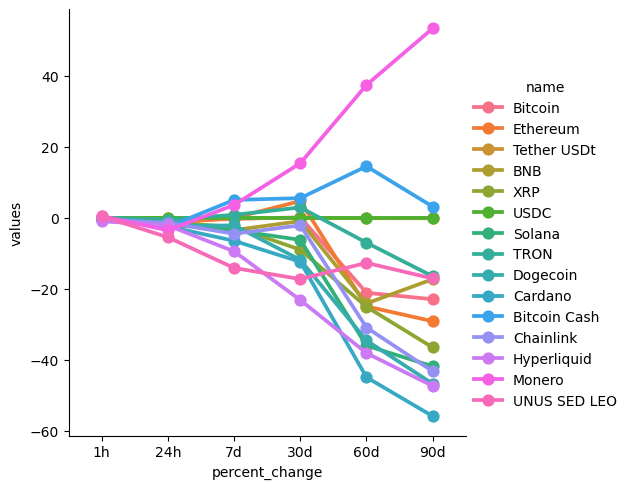

In [21]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [34]:
df8= df2[['name','quote.USD.price','timestamp']]
df8['timestamp'] = pd.to_datetime(df8['timestamp'])
df8=df8.query("name == 'Bitcoin'")
df8

C:\Users\User\AppData\Local\Temp\ipykernel_8432\505111732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['timestamp'] = pd.to_datetime(df8['timestamp'])


,name,quote.USD.price,timestamp
0,Bitcoin,87687.337484,2025-12-24 00:58:28.554829
15,Bitcoin,87687.726903,2025-12-24 00:59:29.994742
30,Bitcoin,87692.890629,2025-12-24 01:00:31.332959
45,Bitcoin,87697.276329,2025-12-24 01:01:32.673671
60,Bitcoin,87709.715372,2025-12-24 01:02:34.009924
75,Bitcoin,87680.063325,2025-12-24 01:03:35.342409
90,Bitcoin,87672.260280,2025-12-24 01:04:36.682543
105,Bitcoin,87230.006805,2025-12-24 04:14:44.462759
120,Bitcoin,87242.427775,2025-12-24 04:15:45.731393
135,Bitcoin,87260.660164,2025-12-24 04:16:47.067493


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

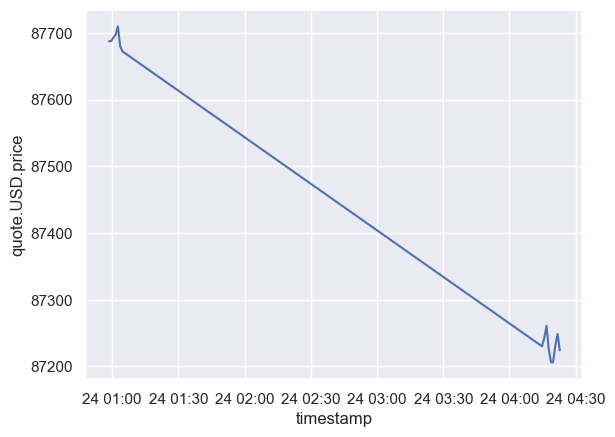

In [35]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df8)